In [ ]:
#Cristian Rivas
'''
Este conjunto de datos generado sintéticamente contiene información de 300 usuarios de una aplicación móvil,
con variables como la versión de la aplicación, la plataforma (Android o iOS), la duración de las sesiones (en minutos),
el número de sesiones, el país del usuario y su retroalimentación (calificación de 1 a 5). Su fuente es un código de
generación controlada y su objetivo es simular datos de uso de aplicaciones para análisis exploratorio'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Cargar los datos
df = pd.read_csv('1_user_app_data.csv')
print("Primeras filas del DataFrame cargado:")
print(df.head())

# Identificar y eliminar valores duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")
if duplicados > 0:
    df = df.drop_duplicates()
    print("Filas duplicadas eliminadas.")

# Identificar datos faltantes
print("\nNúmero de valores faltantes por columna:")
print(df.isnull().sum())

# Verificar tipos de datos
print("\nTipos de datos actuales:")
print(df.dtypes)

# Corregir inconsistencias en valores categóricos
print("\nValores únicos antes de limpieza (columna 'platform'):")
print(df['platform'].unique())

# Estandarizar los valores de la columna 'platform'
df['platform'] = df['platform'].str.strip().str.capitalize()

# Detectar valores inusuales en 'session_duration' (tiempo de sesión)
print("\nValores estadísticos de 'session_duration':")
print(df['session_duration'].describe())

# Suponemos que una sesión mayor a 360 minutos (6 horas) es inusual
df = df[df['session_duration'] <= 360]
print("\nFilas con sesiones mayores a 6 horas eliminadas.")

# Mostrar estadísticas descriptivas de las variables numéricas excepto 'user_id' y 'app_version'
print("\nEstadísticas descriptivas de las variables numéricas (excluyendo 'user_id' y 'app_version'):")
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['user_id'], errors='ignore')
print(numeric_columns.describe())

# Verificar los resultados de la limpieza
print("\nPrimeras filas después de la limpieza:")
print(df.head())


Primeras filas del DataFrame cargado:
   user_id  app_version platform  session_duration  number_of_sessions  \
0        1          1.2  Android               109                  11   
1        2          1.3  Android               116                  17   
2        3          1.0  Android                94                  13   
3        4          1.2      iOS                47                   1   
4        5          1.2      iOS                99                   2   

  country  user_feedback  
0  France              1  
1      UK              2  
2  France              5  
3  Canada              4  
4  Canada              3  

Número de filas duplicadas: 0

Número de valores faltantes por columna:
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64

Tipos de datos actuales:
user_id                 int64
app_version           float64
platform       

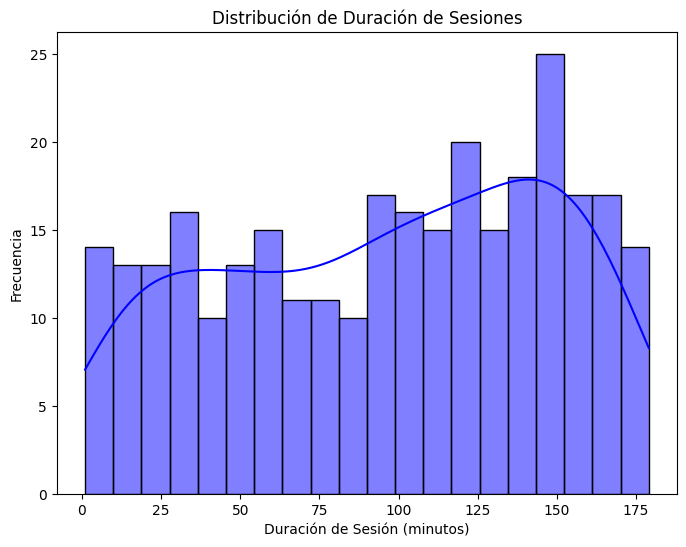

C:\Users\HP\AppData\Local\Temp\ipykernel_1964\3581315061.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='user_feedback', data=df, palette='Set2')


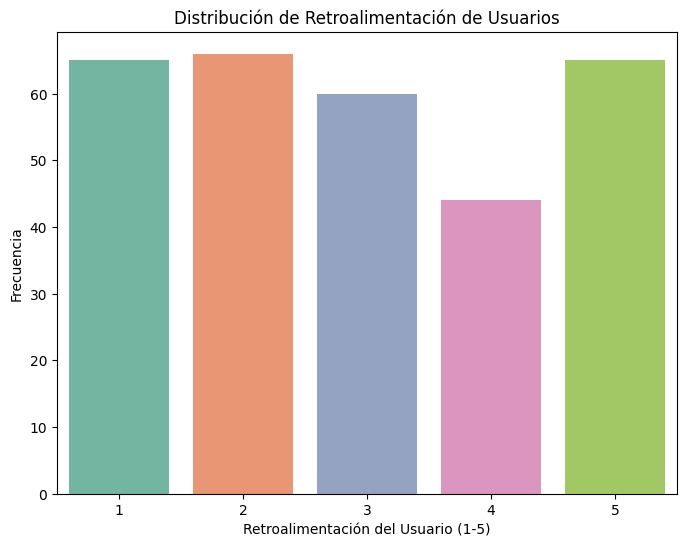

In [20]:
# Exploración de datos

# Visualización univariante 1: Distribución de 'session_duration'
plt.figure(figsize=(8, 6))
sns.histplot(df['session_duration'], kde=True, bins=20, color='blue')
plt.title('Distribución de Duración de Sesiones')
plt.xlabel('Duración de Sesión (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de 'user_feedback'
plt.figure(figsize=(8, 6))
sns.countplot(x='user_feedback', data=df, palette='Set2')
plt.title('Distribución de Retroalimentación de Usuarios')
plt.xlabel('Retroalimentación del Usuario (1-5)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1964\4051259421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='user_feedback', y='session_duration', data=df, palette='Pastel1')


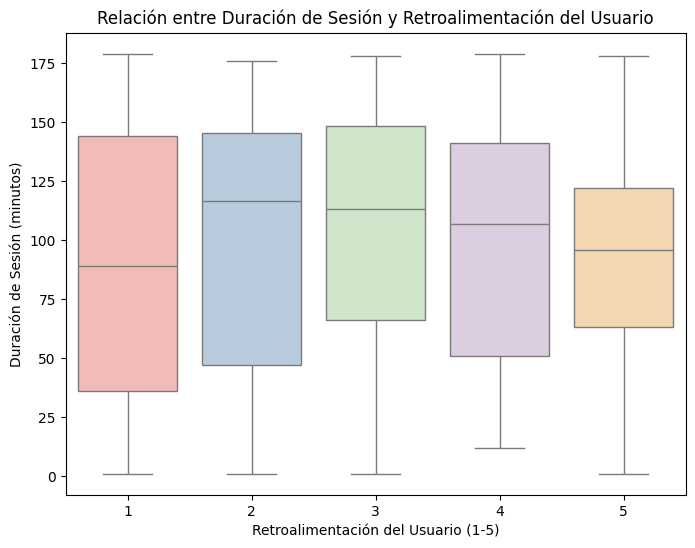

C:\Users\HP\AppData\Local\Temp\ipykernel_1964\4051259421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='platform', y='number_of_sessions', data=df, palette='muted', split=True)


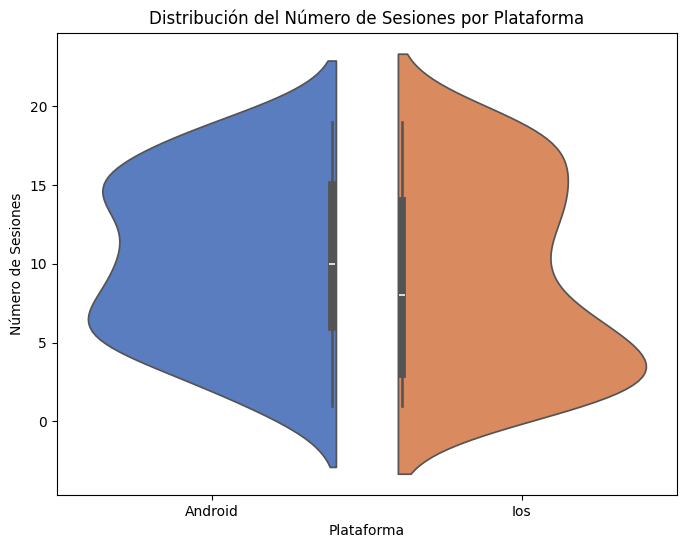

In [21]:
# Relación entre 'session_duration' y 'user_feedback'
plt.figure(figsize=(8, 6))
sns.boxplot(x='user_feedback', y='session_duration', data=df, palette='Pastel1')
plt.title('Relación entre Duración de Sesión y Retroalimentación del Usuario')
plt.xlabel('Retroalimentación del Usuario (1-5)')
plt.ylabel('Duración de Sesión (minutos)')
plt.show()

# Relación entre 'number_of_sessions' y 'platform'
plt.figure(figsize=(8, 6))
sns.violinplot(x='platform', y='number_of_sessions', data=df, palette='muted', split=True)
plt.title('Distribución del Número de Sesiones por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de Sesiones')
plt.show()


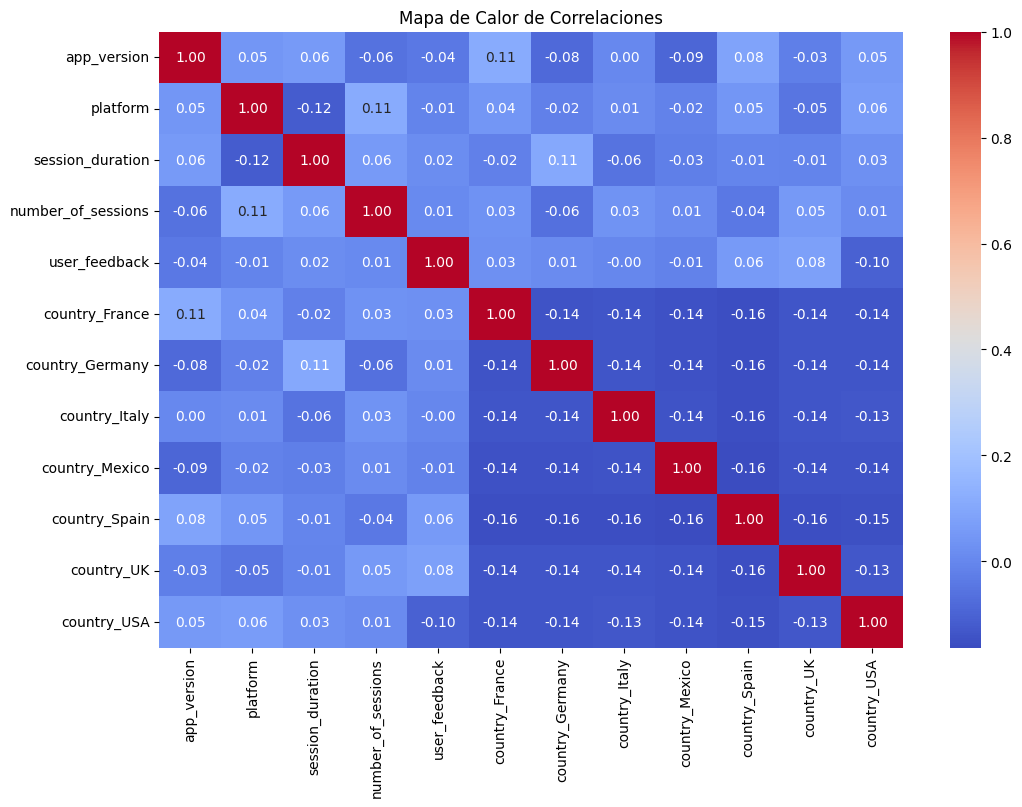

In [22]:

# Cargar datos
df = pd.read_csv('1_user_app_data.csv')

# Eliminar la columna user_id
df = df.drop(columns=['user_id'])

# Codificar platform como binaria (0 para iOS, 1 para Android)
df['platform'] = df['platform'].apply(lambda x: 1 if x.lower() == 'android' else 0)

# Codificar country con one-hot encoding (puedes incluir o excluir esta parte según prefieras)
df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Escalar las variables numéricas
scaler = StandardScaler()
columns_to_scale = ['app_version', 'session_duration', 'number_of_sessions', 'user_feedback']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Generar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()


El análisis exploratorio reveló que las variables del conjunto de datos son en su mayoría independientes, sin correlaciones fuertes, lo que sugiere que aportan información única, aunque esto podría complicar la construcción de modelos predictivos. La duración de las sesiones varía entre 1 y 179 minutos, con un promedio de 95 minutos, y no muestra valores atípicos extremos, mientras que la retroalimentación de los usuarios está uniformemente distribuida entre 1 y 5, siendo ligeramente menor en la categoría 4. Se observó que usuarios con retroalimentación baja (1 o 2) tienden a tener sesiones más largas, lo que podría indicar problemas de experiencia de usuario. Las plataformas (Android e iOS) y los países están equilibrados en términos de distribución, sin mostrar impactos significativos en otras variables, aunque podrían ser útiles para segmentación o análisis regional. Este conjunto de datos presenta oportunidades para clasificación (predecir retroalimentación), segmentación (agrupar usuarios por patrones de uso) y predicción (estimar duración de sesiones), destacándose por su balance y calidad, pero exigiendo un análisis cuidadoso debido a la baja correlación entre las variables.